In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

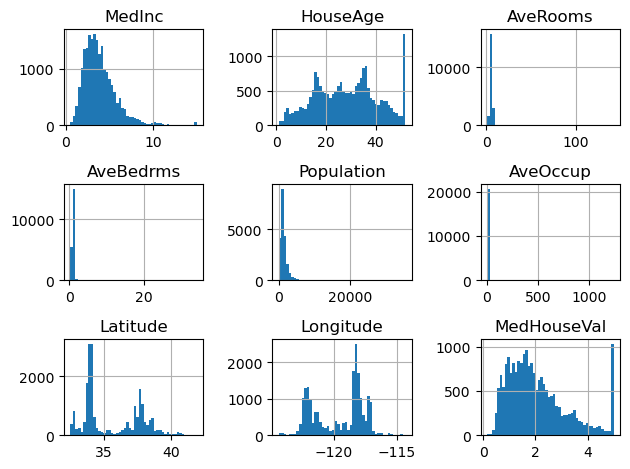

In [2]:
CH=fetch_california_housing()
df_california=pd.DataFrame(CH.data,columns=CH.feature_names)
df_california[CH.target_names[0]]=CH.target
df_california.hist(bins=50)
plt.tight_layout()

# Función logaritmo
$$
X'=\mathrm{log}(X),
$$
para $X\in[1,\infty)$.

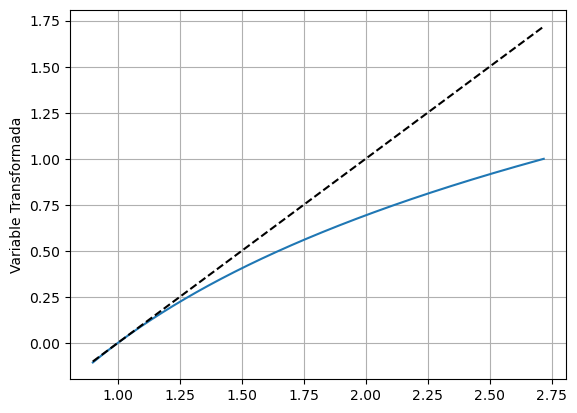

In [3]:
x=np.linspace(0.9,np.e,1000) # Regresa 1000 valores equidistantes entre 0.9 y 10
xp=np.log(x)
plt.plot(x, xp)
plt.plot(x,x-1,'--k')
plt.ylabel('Variable Transformada')
plt.grid()

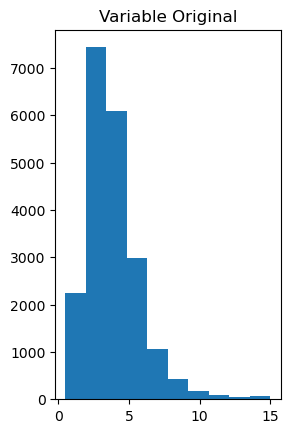

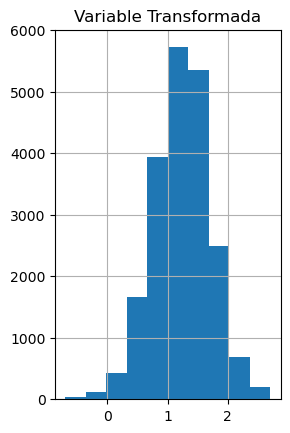

In [4]:
X=df_california['MedInc'] # Transformemos esta variable
X_log=np.log(X)

fig=plt.figure()
ax=fig.add_subplot(121)
ax.hist(X)
ax.set_title('Variable Original')
fig=plt.figure()
ax=fig.add_subplot(122)
ax.hist(X_log)
ax.set_title('Variable Transformada')
plt.grid()

In [5]:
# Sesgos
X.skew(),X_log.skew()

(1.6466567021344465, -0.14608181157738848)

In [6]:
df_california_log=np.log(df_california-df_california.min()+1) # Necesitamos que los valores inicien de 1
df_california_log.skew()

MedInc         0.078282
HouseAge      -1.289170
AveRooms       0.959245
AveBedrms      8.298256
Population    -1.140433
AveOccup       2.662098
Latitude      -0.080214
Longitude     -0.745362
MedHouseVal    0.237146
dtype: float64

In [7]:
df_california.skew()

MedInc          1.646657
HouseAge        0.060331
AveRooms       20.697869
AveBedrms      31.316956
Population      4.935858
AveOccup       97.639561
Latitude        0.465953
Longitude      -0.297801
MedHouseVal     0.977763
dtype: float64

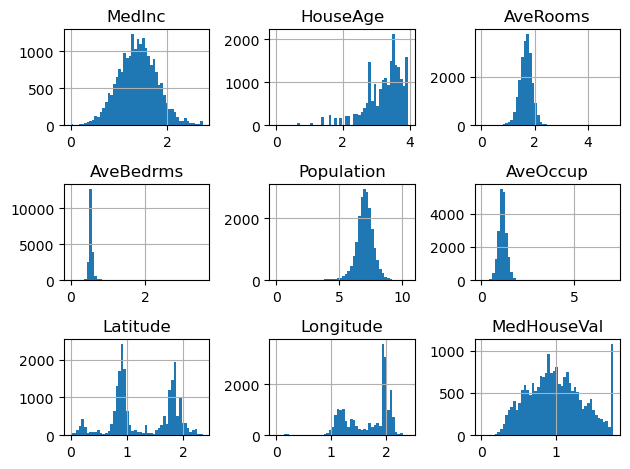

In [8]:
df_california_log.hist(bins=50)
plt.tight_layout()

# Funcion reciproca
$$
X'=\frac{1}{X},
$$
para $X\in[1,\infty)$.


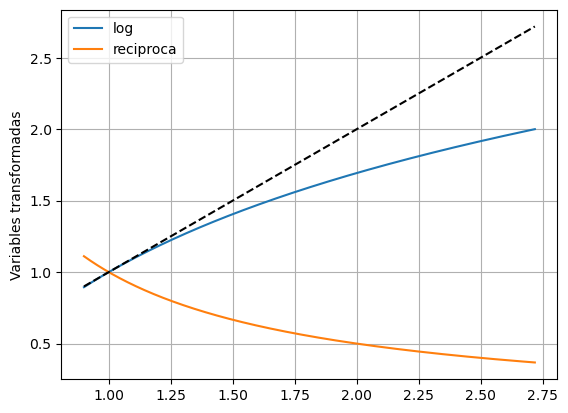

In [9]:
# Graficacion

plt.plot(x,np.log(x)+1,label='log')
plt.plot(x,1/x,label='reciproca')
plt.plot(x,x,'--k')
plt.legend()
plt.ylabel('Variables transformadas')
plt.grid()

In [10]:
df_desplazada=df_california-df_california.min()+1 # Necesitamos la desplazación a los positivos para compensar solo el sesgo positivo
df_california_recip=np.reciprocal(df_desplazada) # 1/df_california
df_california_recip.skew()

MedInc          1.329928
HouseAge        5.719626
AveRooms        1.864921
AveBedrms      -3.911728
Population     80.838678
AveOccup        0.612341
Latitude        1.097306
Longitude       2.185543
MedHouseVal     0.507905
dtype: float64

In [11]:
df_california_log.skew()

MedInc         0.078282
HouseAge      -1.289170
AveRooms       0.959245
AveBedrms      8.298256
Population    -1.140433
AveOccup       2.662098
Latitude      -0.080214
Longitude     -0.745362
MedHouseVal    0.237146
dtype: float64

In [12]:
# Decidimos entre funciones para conseguir el mejor sesgo
for log,recip in zip(df_california_log.skew(),df_california_recip.skew()):
  sesgos=[log,recip]
  minimo=np.argmin(sesgos)
  print(minimo,sesgos[minimo])

0 0.07828238577308295
0 -1.2891698416719752
0 0.9592453656885894
1 -3.911727799127492
0 -1.140432902075791
1 0.6123406072380883
0 -0.08021367912553705
0 -0.7453624105179477
0 0.23714570171725022


In [14]:
df_california_transformado=df_california.copy()
for var in df_california:
  log=df_california_log[var].skew()
  recip=df_california_recip[var].skew()
  sesgos=[log,recip]
  minimo=np.argmin(np.abs(sesgos))
  df_california_transformado[var]=[df_california_log[var],
                                  df_california_recip[var]][minimo]
df_california_transformado.skew()

MedInc         0.078282
HouseAge      -1.289170
AveRooms       0.959245
AveBedrms     -3.911728
Population    -1.140433
AveOccup       0.612341
Latitude      -0.080214
Longitude     -0.745362
MedHouseVal    0.237146
dtype: float64

Regresion Lineal

In [15]:
# Transformación aplicada al target
transformacion=['Logarítmica','Recíproca']
transformacion[np.argmin((df_california_log['MedHouseVal'].skew(),
                          df_california_recip['MedHouseVal'].skew()))]

'Logarítmica'

In [16]:
# Dividimos los datos para el entrenamiento y la prueba (75%-25%)
X,x,Y,y=train_test_split(df_california_transformado.drop(columns='MedHouseVal'),
                         df_california_transformado['MedHouseVal'])

In [17]:
# Entrenamiento de los datos transformados
reg=LinearRegression()
reg.fit(X,Y)

LinearRegression()

In [18]:
reg.score(X,Y),reg.score(x,y)

(0.6255588833270191, 0.6242631983223714)

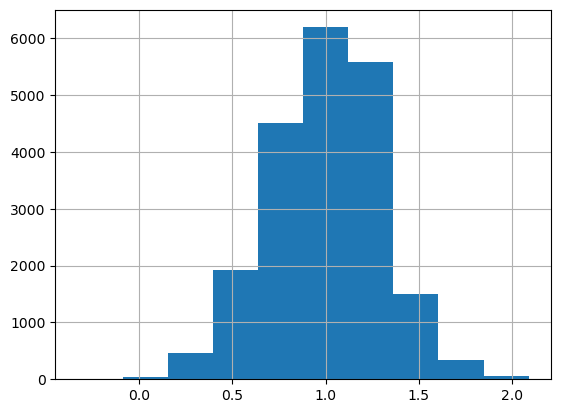

In [19]:
# Aplicamos la inversa de la función evaluada en el target (La exponencial pueh)
prediccion_log=reg.predict(df_california_transformado.drop(columns='MedHouseVal'))
plt.hist(prediccion_log)
plt.grid()

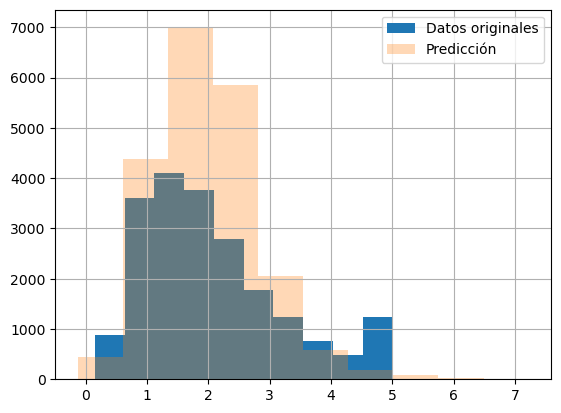

In [20]:
prediccion=np.exp(prediccion_log)+df_california['MedHouseVal'].min()-1
plt.hist(df_california['MedHouseVal'],label='Datos originales')
plt.hist(prediccion,alpha=0.3,label='Predicción')
plt.legend()
plt.grid()

Una regresion mas

In [21]:
ruta=('/Users/ivanm/apps/iteso-data-analytics/data/raw/regresion.csv')
df=pd.read_csv(ruta)
df.head()

,x,y
0,0.100000,1.932916
1,0.101001,2.242087
2,0.102002,2.022414
3,0.103003,1.692315
4,0.104004,1.672025


In [25]:
df_transformado=df.copy()
transformaciones={'ninguna':lambda x:x,
                  'log':lambda x:np.log(x),
                  'recip':lambda x:1/x}
for var in df:
    sesgos={}
    for name,f in transformaciones.items():
        sesgos[name]=np.abs(f(df[var]).skew())
    minimo=min(sesgos,key=sesgos.get)
    df_transformado[var]=transformaciones[minimo](df[var])
df_transformado.skew()

x    0.000000
y   -0.068227
dtype: float64

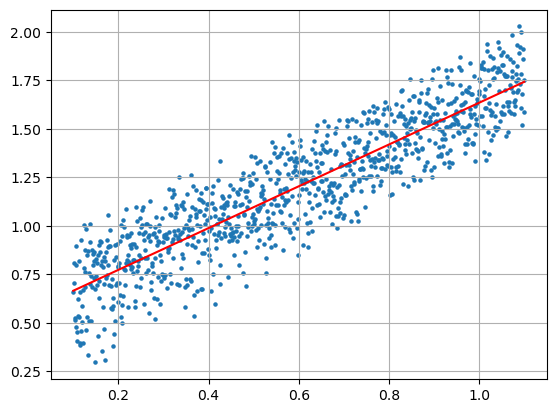

In [26]:
reg=LinearRegression()
reg.fit(df_transformado[['x']],df_transformado['y'])
plt.scatter(df_transformado['x'],df_transformado['y'],s=5)
prediccion_log=reg.predict(df_transformado[['x']])
plt.plot(df_transformado['x'],prediccion_log,'r')
plt.grid()

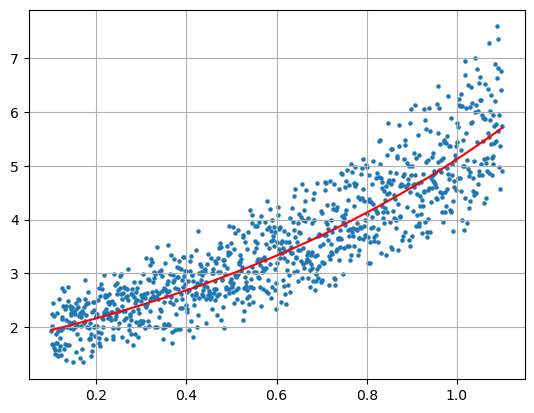

In [27]:
plt.scatter(df['x'],df['y'],s=5)
prediccion=np.exp(prediccion_log)
plt.plot(df['x'],prediccion,'r')
plt.grid()

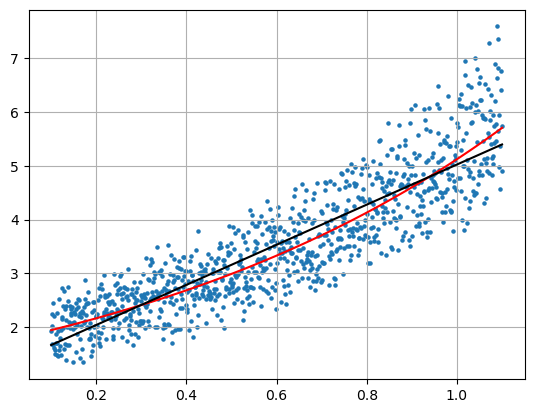

In [33]:
plt.scatter(df['x'],df['y'],s=5)
prediccion=np.exp(prediccion_log)
plt.plot(df['x'],prediccion,'r')
reg_lin=LinearRegression()
reg_lin.fit(df[['x']],df['y'])
plt.plot(df['x'],reg_lin.predict(df[['x']]),'k')
plt.grid()

Examen Teorico
